# bagging and boosting

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, \
AdaBoostClassifier, \
GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, \
confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


# loading and exploring data

In [5]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

df['target'] = cancer.target

df.sample()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.05748,...,28.48,103.9,783.6,0.1216,0.1388,0.17,0.1017,0.2369,0.06599,1


In [6]:
X = df.drop('target', axis=1)
y = df['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
rf_model = RandomForestClassifier(n_estimators=100,
                                 random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred_rf = rf_model.predict(X_test)

In [13]:
print("Accuracy:",accuracy_score(y_test,
                                y_pred_rf))


Accuracy: 0.9649122807017544


In [14]:
print(confusion_matrix(y_test, y_pred_rf))

[[40  3]
 [ 1 70]]


In [15]:
ada_model = AdaBoostClassifier(n_estimators=100,
                              random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [16]:
y_pred_ada = ada_model.predict(X_test)

y_pred_ada

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [17]:
print(accuracy_score(y_test, y_pred_ada))

0.9736842105263158


In [18]:
print(confusion_matrix(y_test, y_pred_ada))

[[41  2]
 [ 1 70]]


In [19]:
gb_model = GradientBoostingClassifier(n_estimators=100,
                                     random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [21]:
y_pred_gb = gb_model.predict(X_test)
y_pred_gb

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [22]:
print(accuracy_score(y_test, y_pred_gb))

0.956140350877193


In [23]:
print(confusion_matrix(y_test, y_pred_gb))

[[40  3]
 [ 2 69]]


In [25]:
model = ['RF','ADA','GB']

score = [accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_gb)
        ]


model_per = dict(zip(model,score))

model_per_df = pd.DataFrame(model_per,
                           index=[1])

model_per_df

,RF,ADA,GB
1,0.964912,0.973684,0.95614


<Axes: >

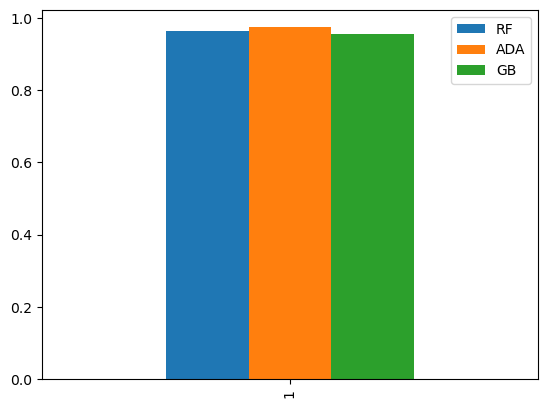

In [28]:
model_per_df.plot(kind='bar')
